In [22]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
import os
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Task 1.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


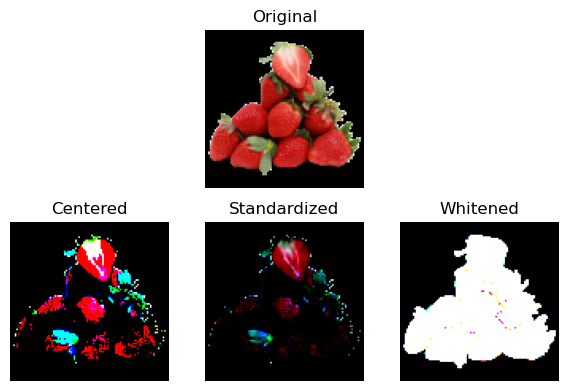

In [23]:
dataset_dir = "dataset"
categories = ["Apples", "Bananas", "Oranges", "Pineapples", "Strawberrys"]
desired_size = (100, 100)

data = []

# Load the dataset
for category in categories:
    path = os.path.join(dataset_dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = Image.open(img_path).resize(desired_size).convert('RGB')
        image = np.array(image)
        data.append([image, label])

np.random.shuffle(data)
images = np.array([item[0] for item in data])
labels = np.array([item[1] for item in data])

# centering
def center(images):
    return images - np.mean(images, axis=0)

# standardization
def standardize(images):
    centered_images = center(images)
    return centered_images / np.std(centered_images, axis=0)

# whitening
def whitening(images):
    original_shape = images.shape
    flattened_images = images.reshape(original_shape[0], -1)
    
    pca = PCA(whiten=True)
    whitened = pca.fit_transform(flattened_images)
    
    reconstructed = pca.inverse_transform(whitened)
    return reconstructed.reshape(original_shape)

def PlotSample(images, labels, index):
    plt.imshow(images[index])
    plt.title(categories[labels[index]])
    plt.show()

def PlotAll(original_image, images_list, labels_list):
    num_images = len(images_list)
    plt.figure(figsize=(2*num_images, 4))
    
    # Plotting the original image
    plt.subplot(2, num_images, (num_images//2)+1)
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis('off')
    
    # Plotting the processed images
    for i, (image, label) in enumerate(zip(images_list, labels_list)):
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Pre-processing steps
images_centered = center(images)
images_standardized = standardize(images)
images_whitened = whitening(images)

# List of processed images and their labels
images_list = [images_centered[3], images_standardized[3], images_whitened[3]]
labels_list = ["Centered", "Standardized", "Whitened"]

# Plotting
PlotAll(images[3], images_list, labels_list)

## Task 1.2

In [24]:
data = np.load('vecs.npy', allow_pickle=True).item()

def extract_data_for_position(data, position):
    position_key = f"{position}_pos"  # Convert position to the appropriate key
    position_data = data.get(position_key, {})

    embeddings = []
    labels = []
    for digit, embedding_list in position_data.items():
        for embedding in embedding_list:
            embeddings.append(embedding)
            labels.append(digit)

    return np.array(embeddings), np.array(labels)
  
def shuffle_data(embeddings, labels):
    # Get a permutation of indices
    permuted_indices = np.random.permutation(len(embeddings))
    
    # Shuffle the embeddings and labels using these indices
    shuffled_embeddings = embeddings[permuted_indices]
    shuffled_labels = labels[permuted_indices]
    
    return shuffled_embeddings, shuffled_labels

embeddings, labels = extract_data_for_position(data, 1)

def print_embeddings_and_labels(embeddings, labels):
    for i, (embedding, label) in enumerate(zip(embeddings, labels)):
        print(f"Sample {i+1}:")
        print(f"Label: {label}")
        print(f"Embedding: {embedding}")
        print("-" * 50)  # Just a separator for clarity

#print_embeddings_and_labels(embeddings, labels)

shuffled_embeddings, shuffled_labels = shuffle_data(embeddings, labels)

print_embeddings_and_labels(shuffled_embeddings, shuffled_labels)

assert len(embeddings) == len(labels), "Mismatch in lengths of embeddings and labels."

for idx, emb in enumerate(embeddings):
    assert labels[idx] is not None, f"No label for embedding at index {idx}"

shuffled_embeddings, shuffled_labels = shuffle_data(embeddings, labels)

for emb, lbl in zip(shuffled_embeddings, shuffled_labels):
    assert (emb.tolist() in embeddings.tolist()) and (lbl in labels), "Mismatch after shuffling."

assert not (np.all(np.equal(embeddings, shuffled_embeddings)) and np.all(np.equal(labels, shuffled_labels))), "Data was not shuffled."

print("All checks passed!")

Sample 1:
Label: 1
Embedding: [-0.      91.22508 -0.      ... -0.      -0.      -0.     ]
--------------------------------------------------
Sample 2:
Label: 1
Embedding: [-0. -0. -0. ... -0. -0. -0.]
--------------------------------------------------
Sample 3:
Label: 7
Embedding: [ -0.      164.71776  -0.      ...  -0.       -0.       -0.     ]
--------------------------------------------------
Sample 4:
Label: 7
Embedding: [-0. -0. -0. ... -0. -0. -0.]
--------------------------------------------------
Sample 5:
Label: 8
Embedding: [-0.000000e+00 -0.000000e+00 -1.866342e-36 ... -0.000000e+00 -0.000000e+00
 -0.000000e+00]
--------------------------------------------------
Sample 6:
Label: 2
Embedding: [-0. -0. -0. ... -0. -0. -0.]
--------------------------------------------------
Sample 7:
Label: 2
Embedding: [-0.       25.291656 -0.       ... -0.       -0.       -0.      ]
--------------------------------------------------
Sample 8:
Label: 1
Embedding: [-0. -0. -0. ... -0. -0. -0.]


## Task 2.1

In [25]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [26]:
Xtr.shape

(60000, 28, 28)

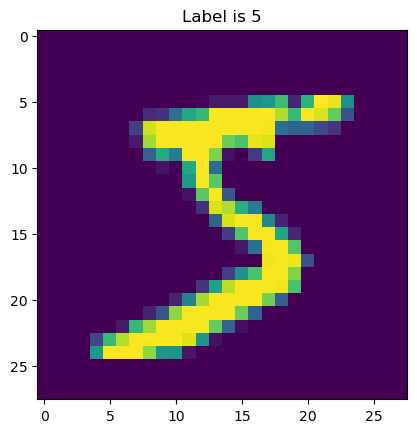

In [27]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


C:\Users\andre\AppData\Local\Temp\ipykernel_62084\383047006.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0=plt.subplot(2,2,1)
C:\Users\andre\AppData\Local\Temp\ipykernel_62084\383047006.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(2,2,2)


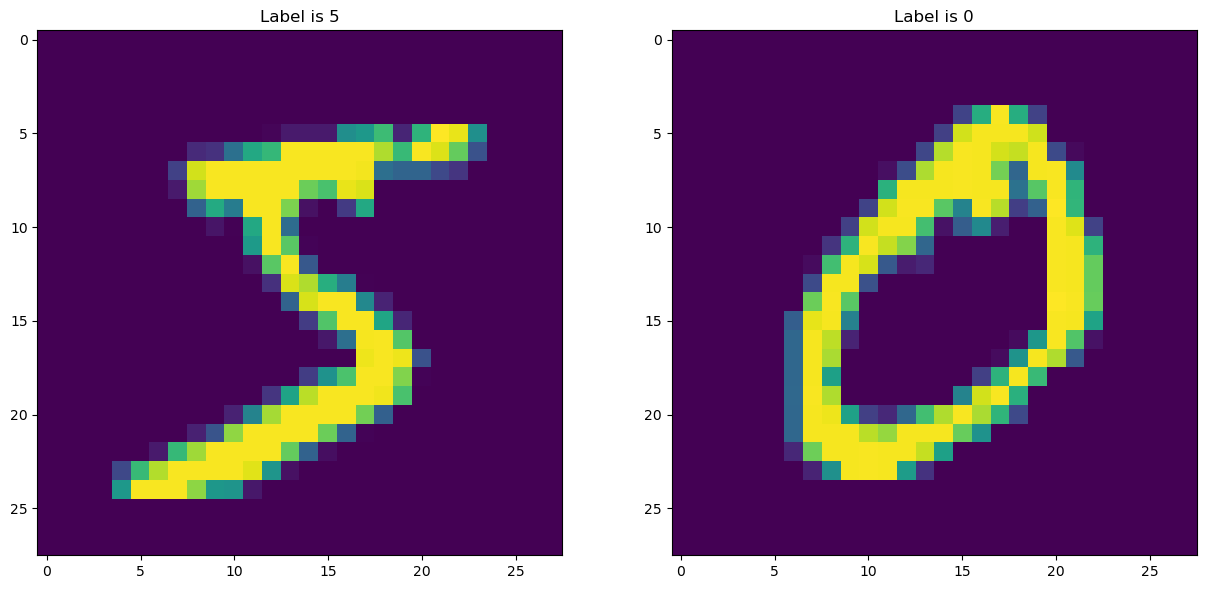

In [28]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [29]:
28*28

784

In [30]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int) # bug here (now fixed)
Tr_set.shape

(500, 784)

In [31]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)

        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [32]:
def predict_with_L2(X):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances = np.sqrt(np.sum(np.square(Tr_set - X[i,:]), axis=1))
        min_index = np.argmin(distances)
        Lpred[i] = Ltr_set[min_index]
    return Lpred

In [33]:
def kNN_predict(X, k=3):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        # distances = np.sum(np.abs(Tr_set - X[i, :]), axis=1)
        distances = np.sqrt(np.sum(np.square(Tr_set - X[i,:]), axis=1))
        
        # Getting the indices of the top k smallest distances
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = Ltr_set[k_nearest_indices]
        
        # Voting to get the most common label
        Lpred[i] = np.bincount(k_nearest_labels).argmax()
        
    return Lpred

## Task 2.2

In [34]:
def predictFoldKNN(X, X_train, y_train, k=3):
    num_test = X.shape[0]
    Lpred = np.zeros(num_test, dtype=y_train.dtype)

    for i in range(num_test):
        distances = np.sqrt(np.sum(np.square(X_train - X[i,:]), axis=1))

        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_nearest_indices]

        Lpred[i] = np.bincount(k_nearest_labels).argmax()

    return Lpred

def cross_validation(X, y, k_values, num_folds=3):
    kf = KFold(n_splits=num_folds)
    accuracies = {}

    for k in k_values:
        k_accuracies = []
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            y_pred = predictFoldKNN(X_val, X_train, y_train, k)
            accuracy = np.mean(y_pred == y_val)
            k_accuracies.append(accuracy)

        accuracies[k] = np.mean(k_accuracies)
        print(f"Accuracy for k={k}: {accuracies[k]:.4f}")

    best_k = max(accuracies, key=accuracies.get)
    return best_k

k_values = [1, 2, 3, 4, 5, 7, 9, 11, 13, 15]
best_k = cross_validation(Tr_set, Ltr_set, k_values)
print(f"Best value for k using 3-fold cross-validation is: {best_k}")

Test_images = X_test.reshape(X_test.shape[0], X_test.shape[1]* X_test.shape[2])

Labels_predicted_kNN = predictFoldKNN(Test_images, Tr_set, Ltr_set, best_k)
print(f"Accuracy with best k={best_k}:", np.mean(Labels_predicted_kNN == L_test))

Accuracy for k=1: 0.8320
Accuracy for k=2: 0.7880
Accuracy for k=3: 0.8240
Accuracy for k=4: 0.8140
Accuracy for k=5: 0.8160
Accuracy for k=7: 0.7980
Accuracy for k=9: 0.8000
Accuracy for k=11: 0.7860
Accuracy for k=13: 0.7620
Accuracy for k=15: 0.7541
Best value for k using 3-fold cross-validation is: 1
Accuracy with best k=1: 0.8294


In [35]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)
Labels_predicted_L2 = predict_with_L2(Test_images)
Labels_predicted_kNN = kNN_predict(Test_images, 3)

print("Accuracy with L1 norm:", np.mean(Labels_predicted==L_test))
print("Accuracy with L2 norm:", np.mean(Labels_predicted_L2 == L_test))
print(f"Accuracy with k=3:", np.mean(Labels_predicted_kNN == L_test))

Accuracy with L1 norm: 0.811
Accuracy with L2 norm: 0.8294
Accuracy with k=3: 0.8061


### Task 3.1

In [36]:
# Load the Iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [37]:
# Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8) # 80:20

# Kernals: Linear, Polynomial, RBF
linear_ovo = svm.SVC(kernel="linear", decision_function_shape="ovo").fit(x_train, y_train) # one-vs-one
linear_ovr = svm.SVC(kernel="linear", decision_function_shape="ovr").fit(x_train, y_train) # one-vs-rest

poly_ovo = svm.SVC(kernel="poly", decision_function_shape="ovo").fit(x_train, y_train) # one-vs-one
poly_ovr = svm.SVC(kernel="poly", decision_function_shape="ovr").fit(x_train, y_train) # one-vs-rest

rbf_ovo = svm.SVC(kernel="rbf", decision_function_shape="ovo").fit(x_train, y_train) # one-vs-one
rbf_ovr = svm.SVC(kernel="rbf", decision_function_shape="ovr").fit(x_train, y_train) # one-vs-rest

In [38]:
# Confusion Matrix

# Predict using each classifier
y_pred_linear_ovo = linear_ovo.predict(x_test)
y_pred_linear_ovr = linear_ovr.predict(x_test)

y_pred_poly_ovo = poly_ovo.predict(x_test)
y_pred_poly_ovr = poly_ovr.predict(x_test)

y_pred_rbf_ovo = rbf_ovo.predict(x_test)
y_pred_rbf_ovr = rbf_ovr.predict(x_test)

# Construct confusion matrices
cm_linear_ovo = confusion_matrix(y_test, y_pred_linear_ovo)
cm_linear_ovr = confusion_matrix(y_test, y_pred_linear_ovr)

cm_poly_ovo = confusion_matrix(y_test, y_pred_poly_ovo)
cm_poly_ovr = confusion_matrix(y_test, y_pred_poly_ovr)

cm_rbf_ovo = confusion_matrix(y_test, y_pred_rbf_ovo)
cm_rbf_ovr = confusion_matrix(y_test, y_pred_rbf_ovr)

# Print confusion matrices
print("Confusion Matrix for Linear Kernel (One-vs-One):")
print(cm_linear_ovo)
print("\nConfusion Matrix for Linear Kernel (One-vs-Rest):")
print(cm_linear_ovr)

print("\nConfusion Matrix for Polynomial Kernel (One-vs-One):")
print(cm_poly_ovo)
print("\nConfusion Matrix for Polynomial Kernel (One-vs-Rest):")
print(cm_poly_ovr)

print("\nConfusion Matrix for RBF Kernel (One-vs-One):")
print(cm_rbf_ovo)
print("\nConfusion Matrix for RBF Kernel (One-vs-Rest):")
print(cm_rbf_ovr)

Confusion Matrix for Linear Kernel (One-vs-One):
[[ 9  0  0]
 [ 0  5  2]
 [ 0  0 14]]

Confusion Matrix for Linear Kernel (One-vs-Rest):
[[ 9  0  0]
 [ 0  5  2]
 [ 0  0 14]]

Confusion Matrix for Polynomial Kernel (One-vs-One):
[[ 9  0  0]
 [ 0  5  2]
 [ 0  1 13]]

Confusion Matrix for Polynomial Kernel (One-vs-Rest):
[[ 9  0  0]
 [ 0  5  2]
 [ 0  1 13]]

Confusion Matrix for RBF Kernel (One-vs-One):
[[ 9  0  0]
 [ 0  6  1]
 [ 0  1 13]]

Confusion Matrix for RBF Kernel (One-vs-Rest):
[[ 9  0  0]
 [ 0  6  1]
 [ 0  1 13]]


In [39]:
# Accuracy and F1 score

# Calculate accuracy and F1 score for each classifier
results = {
    "Linear OvO": (accuracy_score(y_test, y_pred_linear_ovo), f1_score(y_test, y_pred_linear_ovo, average='weighted')),
    "Linear OvR": (accuracy_score(y_test, y_pred_linear_ovr), f1_score(y_test, y_pred_linear_ovr, average='weighted')),
    "Poly OvO": (accuracy_score(y_test, y_pred_poly_ovo), f1_score(y_test, y_pred_poly_ovo, average='weighted')),
    "Poly OvR": (accuracy_score(y_test, y_pred_poly_ovr), f1_score(y_test, y_pred_poly_ovr, average='weighted')),
    "RBF OvO": (accuracy_score(y_test, y_pred_rbf_ovo), f1_score(y_test, y_pred_rbf_ovo, average='weighted')),
    "RBF OvR": (accuracy_score(y_test, y_pred_rbf_ovr), f1_score(y_test, y_pred_rbf_ovr, average='weighted'))
}

# Determine the best kernel based on accuracy and F1 score
best_accuracy_kernel = max(results, key=lambda k: results[k][0])
best_f1_score_kernel = max(results, key=lambda k: results[k][1])

print(f"Best Accuracy is achieved using {best_accuracy_kernel} with a score of {results[best_accuracy_kernel][0]:.2f}")
print(f"Best F1 Score is achieved using {best_f1_score_kernel} with a score of {results[best_f1_score_kernel][1]:.2f}")

Best Accuracy is achieved using Linear OvO with a score of 0.93
Best F1 Score is achieved using RBF OvO with a score of 0.93


In [43]:
# Support Vectors

# List of trained OvR classifiers
ovr_classifiers = [linear_ovr, poly_ovr, rbf_ovr]

for classifier, kernel in zip(ovr_classifiers, ["Linear", "Poly", "RBF"]):
    print(f"\nSupport Vectors for {kernel} Kernel (One-vs-Rest):")
    
    # Extract support vectors
    support_vectors = classifier.support_vectors_
    
    support_vector_labels = np.sign(classifier.dual_coef_[0])
    
    for class_index in range(len(iris.target_names)):
        class_support_vectors = support_vectors[support_vector_labels == (class_index - 1)]
        print(f"\nClass {class_index} ({iris.target_names[class_index]}):")
        print(class_support_vectors)


Support Vectors for Linear Kernel (One-vs-Rest):

Class 0 (setosa):
[[5.1 2.5 3.  1.1]
 [6.  3.  4.8 1.8]]

Class 1 (versicolor):
[[5.1 3.8 1.9 0.4]
 [5.9 3.2 4.8 1.8]
 [5.4 3.  4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.2 2.2 4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.6 3.  4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [6.3 3.3 4.7 1.6]
 [6.  2.9 4.5 1.5]
 [5.9 3.  5.1 1.8]
 [6.3 2.7 4.9 1.8]
 [6.5 3.  5.2 2. ]
 [6.  2.2 5.  1.5]
 [6.3 2.8 5.1 1.5]
 [6.2 2.8 4.8 1.8]
 [5.6 2.8 4.9 2. ]]

Class 2 (virginica):
[[5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]]

Support Vectors for Poly Kernel (One-vs-Rest):

Class 0 (setosa):
[[5.1 2.5 3.  1.1]
 [5.6 2.8 4.9 2. ]]

Class 1 (versicolor):
[[5.7 3.8 1.7 0.3]
 [5.1 3.8 1.9 0.4]
 [5.9 3.2 4.8 1.8]
 [5.4 3.  4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.2 2.2 4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.3 2.7 4.9 1.8]
 [6.  3.  4.8 1.8]
 [6.  2.2 5.  1.5]
 [6.3 2.8 5.1 1.5]
 [6.2 2.8 4.8 1.8]]

Class 2 (virginica):
[[5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]]

Support Vectors for RBF Kernel (One-vs-Rest):

Class 0 (setosa):

In [41]:
def plot_decision_boundary(model, X, feature_indices, ax=None):
    # Create a mesh grid for the feature space
    h = .02  # step size in the mesh
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Prepare the input data: set non-plotted features to their mean values
    if X.shape[1] == 4:
        filler_values = X.mean(axis=0)
        data = np.c_[xx.ravel(), yy.ravel()]
        for i in range(4):
            if i not in feature_indices:
                data = np.insert(data, i, filler_values[i], axis=1)
    else:
        data = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict for each point in the mesh grid
    Z = model.predict(data)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlabel(f'Feature {feature_indices[0]}')
    ax.set_ylabel(f'Feature {feature_indices[1]}')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

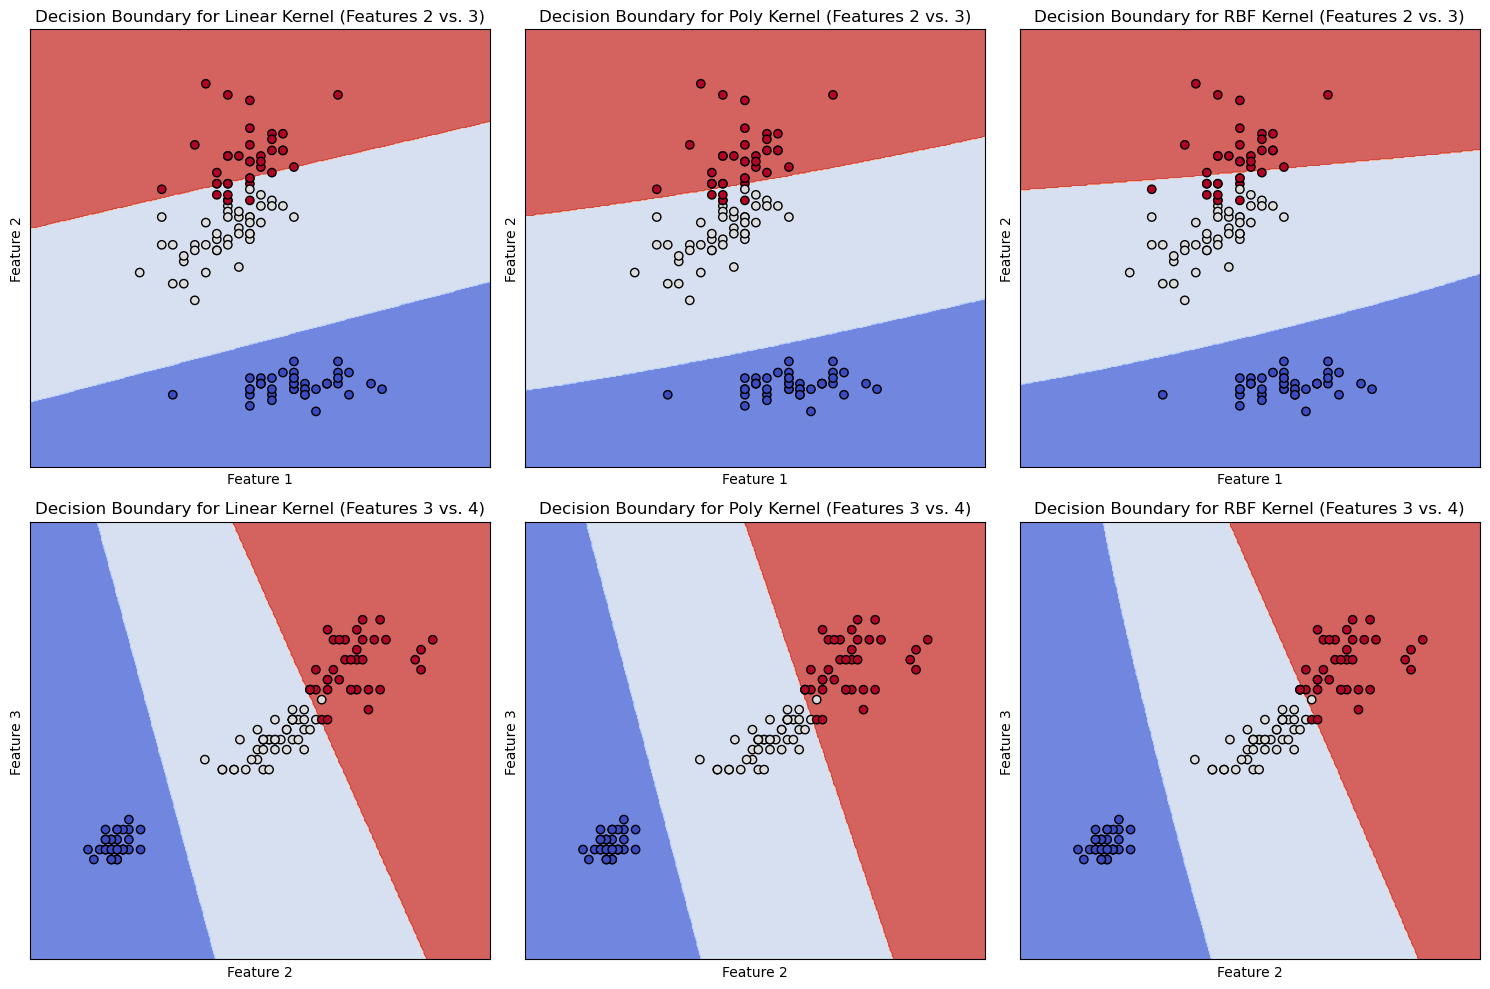

In [42]:
# List of trained classifiers
classifiers = [linear_ovo, poly_ovo, rbf_ovo]
kernel_names = ["Linear", "Poly", "RBF"]

# Plotting for features 2 vs. 3
plt.figure(figsize=(15,10))
for i, (clf, kernel) in enumerate(zip(classifiers, kernel_names)):
    plt.subplot(2, 3, i + 1)
    plot_decision_boundary(clf, x_train, [1, 2])
    plt.title(f"Decision Boundary for {kernel} Kernel (Features 2 vs. 3)")

# Plotting for features 3 vs. 4
for i, (clf, kernel) in enumerate(zip(classifiers, kernel_names)):
    plt.subplot(2, 3, i + 4)
    plot_decision_boundary(clf, x_train, [2, 3])
    plt.title(f"Decision Boundary for {kernel} Kernel (Features 3 vs. 4)")

plt.tight_layout()
plt.show()